In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data_train_X = pd.read_csv('./data_fraud/X_train.csv')
data_train_Y = pd.read_csv('./data_fraud/Y_train.csv')

# General process on entire data
#######################################################
# Filling missing values for feature amount with mean
data_train_X['amount'] = data_train_X['amount'].replace(0, np.NaN)
data_train_X['amount'].fillna(data_train_X['amount'].mean(), inplace=True)

# Dummy zip feature(Dropped for now)
print(len(data_train_X['zip'].unique()))
data_train_X = data_train_X.drop('zip', axis=1)  # Dropping for now

# Dummy state feature
data_train_X = pd.concat([data_train_X, pd.get_dummies(data_train_X['state'])], axis=1)
data_train_X = data_train_X.drop('state', axis=1)
#######################################################

# Split train and validation
train_X = data_train_X[:70000].copy()
train_Y = data_train_Y[:70000].copy()

val_X = data_train_X[70000:].copy()
val_Y = data_train_Y[70000:].copy()

904


In [3]:
print(data_train_X.columns)

Index(['amount', 'hour_a', 'customerAttr_a', 'field_a', 'customerAttr_b',
       'field_b', 'hour_b', 'flag_a', 'total', 'field_c', 'field_d',
       'indicator_a', 'indicator_b', 'flag_b', 'flag_c', 'flag_d', 'flag_e',
       'AE', 'AK', 'AL', 'AP', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
       'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV',
       'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VA', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object')


In [6]:
data_train_X['hour_a'].corr(data_train_X['hour_b'])
# data_train_X = data_train_X.drop('hour_b', axis=1)


0.99394898599449033

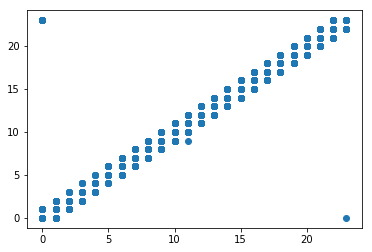

In [7]:
plt.scatter(data_train_X['hour_a'], data_train_X['hour_b'])
plt.show()